In [ ]:
import numpy as np 
import tensorflow as tf
import keras
import matploylib

In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #importando o set

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [11]:
x_train.shape, x_test.shape #28 pixels de largura com 28 de comprimento, com 784 pixels

((60000, 28, 28), (10000, 28, 28))

In [17]:
x_train, x_train.max() #varia entre 0 a 255, ou seja de preto ao branco respectivamente


(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [19]:
y_train #classe em que os pixels pertencem respectivamente ao x_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Text(0.5, 1.0, 'Classe5')

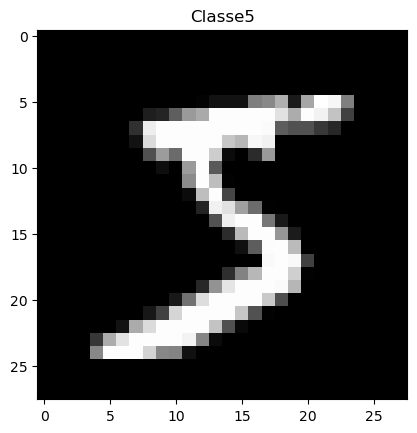

In [27]:
plt.imshow(x_train[0], cmap="gray") #pegando uma imagem especfica com uma formatacao de melhor visualizacao, o gray
plt.title("Classe"+str(y_train[0])) #pegando a classe respectiva

In [31]:
#execucao de pre processamento para ficar no formato compativel a rede neural
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) #primeira posicao a quantidade de imagens e depois o 28x28 e no final add o nuemro 1, em escala de cinza(qquantidade de canais da imagens, RBG)

In [43]:
#execucao de pre processamento para ficar no formato compativel a rede neural
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1) #primeira posicao a quantidade de imagens e depois o 28x28 e no final add o nuemro 1, em escala de cinza(qquantidade de canais da imagens, RBG)

In [45]:
x_train.shape #1 final add

(60000, 28, 28, 1)

In [49]:
x_test.shape #1 final add

(10000, 28, 28, 1)

In [39]:
x_train = x_train.astype("float32") #mudando o tipo da variavel

In [51]:
x_test = x_test.astype("float32")

In [53]:
x_train /= 255 #dividir cada valor pelo valor max

In [55]:
x_test /= 255 #dividir cada valor pelo valor max

In [59]:
x_train.max(), x_train.min() #valores entre 0 e 1 apos dividir por 255

(1.0, 0.0)

In [65]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [67]:
y_train 

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [69]:
y_train [0] #cada posicao e um array, dando em um numero para cada combinacao de 0, realizando a codificacao dos numeros initeiros para ser usados na camada de saida

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [101]:
rede_neural = Sequential() #camada de entrada
rede_neural.add(InputLayer(shape = (28,28,1))) #28 pixels de altura por 28 de largura

rede_neural.add(Conv2D(filters = 32, kernel_size = (3,3), activation = "relu"))#camada de convolucao, com o valor padrao de 32 filtros(kernels), depois o tamanho da matriz
rede_neural.add(BatchNormalization())  #camada de normalizacao
rede_neural.add(MaxPooling2D(pool_size = (2,2)))#camada de max pooling

rede_neural.add(Conv2D(filters = 32, kernel_size = (3,3), activation = "relu"))#camada de convolucao, com o valor padrao de 32 filtros(kernels), depois o tamanho da matriz
rede_neural.add(BatchNormalization()) # camada de normalizacao
rede_neural.add(MaxPooling2D(pool_size = (2,2)))#camada de max pooling

rede_neural.add(Flatten()) #camada flatten

rede_neural.add(Dense(units = 128, activation = "relu")) 
rede_neural.add(Dropout(0,2))
rede_neural.add(Dense(units = 128, activation = "relu")) 
rede_neural.add(Dropout(0,2))
rede_neural.add(Dense(units=10, activation = "softmax"))#camada de saida

In [105]:
rede_neural.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,154 (508.41 KB)

 Trainable params: 130,026 (507.91 KB)

 Non-trainable params: 128 (512.00 B)

In [109]:
rede_neural.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [111]:
rede_neural.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))
#total de 469, sendo resultada da divisao de 60000 dados dividido por 128

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9095 - loss: 0.2934 - val_accuracy: 0.9428 - val_loss: 0.2349
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9875 - loss: 0.0399 - val_accuracy: 0.9874 - val_loss: 0.0362
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9921 - loss: 0.0246 - val_accuracy: 0.9858 - val_loss: 0.0478
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9945 - loss: 0.0175 - val_accuracy: 0.9898 - val_loss: 0.0344
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9950 - loss: 0.0146 - val_accuracy: 0.9892 - val_loss: 0.0385


In [112]:
resultado = rede_neural.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9869 - loss: 0.0439


In [113]:
resultado #erro x accuracy

[0.038521576672792435, 0.9891999959945679]